### 0. Business Problem

Develop a model t

### 1. Business Understanding

##  1.1. Business Objectives
- Early identification of At-risk Employees - Develop a predictive model to classify employees as at risk or not at risk based on demographic and job-related data.

- Identify Key Risk Factors - Identify the strongest predictors of mental health risk by analyzing demographic, workplace, and personal mental health history features.

- Enable Proactive Intervention - Enable early intervention through predictive insights to inform targeted wellness programs and enhance workplace policies.

### 1.2. Key stakeholders

- Employees – Benefit from a healthier, more supportive work environment.

- Executives & Decision-Makers – Assess ROI through productivity improvements and cost savings.

- HR & Wellness Teams – Implement interventions based on model insights.


### 1.3. Business Impact
- Mental health-friendly workplaces will boost job satisfaction and increase retention among highly skilled tech professionals.

- Organizations can personalize wellness initiatives based on real risks rather than general assumptions.


### 2. Data Understanding

In [394]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [395]:
df = pd.read_csv('survey.csv')
df.head()
                 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [397]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [398]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [399]:
df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)

df.isnull().sum().max() 
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### 3. Data Preparation


In [472]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [473]:
df['work_interfere'] = df['work_interfere'].replace([None, np.nan], 'Don\'t know')
df['work_interfere']

0       2
1       3
2       3
3       2
4       1
       ..
1254    0
1255    2
1256    4
1257    0
1258    4
Name: work_interfere, Length: 1259, dtype: int64

In [474]:
print(len(df))
print(df.shape)

1259
(1259, 24)


In [475]:
# labelEncoding for Decision Tree

# Initialize Label Encoder
encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['self_employed', 'family_history', 'benefits', 'care_options', 'wellness_program', 'seek_help', 
                    'anonymity', 'Gender', 'Country', 'remote_work', 'tech_company', 'treatment', 'work_interfere', 
                    'no_employees', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 
                    'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))  # Convert to string before encoding




In [404]:
df.dtypes

Age                          int64
Gender                       int64
Country                      int64
self_employed                int64
family_history               int64
treatment                    int64
work_interfere               int64
no_employees                 int64
remote_work                  int64
tech_company                 int64
benefits                     int64
care_options                 int64
wellness_program             int64
seek_help                    int64
anonymity                    int64
leave                        int64
mental_health_consequence    int64
phys_health_consequence      int64
coworkers                    int64
supervisor                   int64
mental_health_interview      int64
phys_health_interview        int64
mental_vs_physical           int64
obs_consequence              int64
dtype: object

In [405]:
df.corr()['treatment'].sort_values(ascending=False)

treatment                    1.000000
work_interfere               0.614879
family_history               0.377918
care_options                 0.236578
benefits                     0.226140
obs_consequence              0.156972
anonymity                    0.142889
mental_health_interview      0.098413
wellness_program             0.094713
seek_help                    0.089935
Country                      0.077681
coworkers                    0.068433
mental_vs_physical           0.062642
leave                        0.061549
phys_health_interview        0.051859
mental_health_consequence    0.030221
Age                          0.027860
remote_work                  0.026937
self_employed                0.015943
phys_health_consequence     -0.008933
tech_company                -0.031525
supervisor                  -0.036199
no_employees                -0.050114
Gender                      -0.051068
Name: treatment, dtype: float64

### Modelling

In [406]:
X = df.drop('treatment', axis=1)  
y = df['treatment']  

In [407]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [408]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [409]:
y_pred = model.predict(X_test)


In [410]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       129
           1       0.73      0.93      0.81       123

    accuracy                           0.79       252
   macro avg       0.82      0.80      0.79       252
weighted avg       0.82      0.79      0.79       252


Confusion Matrix:
 [[ 86  43]
 [  9 114]]


In [411]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [412]:
best_model = DecisionTreeClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [413]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top 10 most relevant features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_train, y_train)

# See which features matter most
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Country', 'family_history', 'work_interfere', 'benefits',
       'care_options', 'anonymity', 'leave', 'mental_health_consequence',
       'mental_vs_physical'],
      dtype='object')


In [414]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       129
           1       0.74      0.94      0.83       123

    accuracy                           0.81       252
   macro avg       0.83      0.81      0.81       252
weighted avg       0.83      0.81      0.81       252



### 4. Visualization

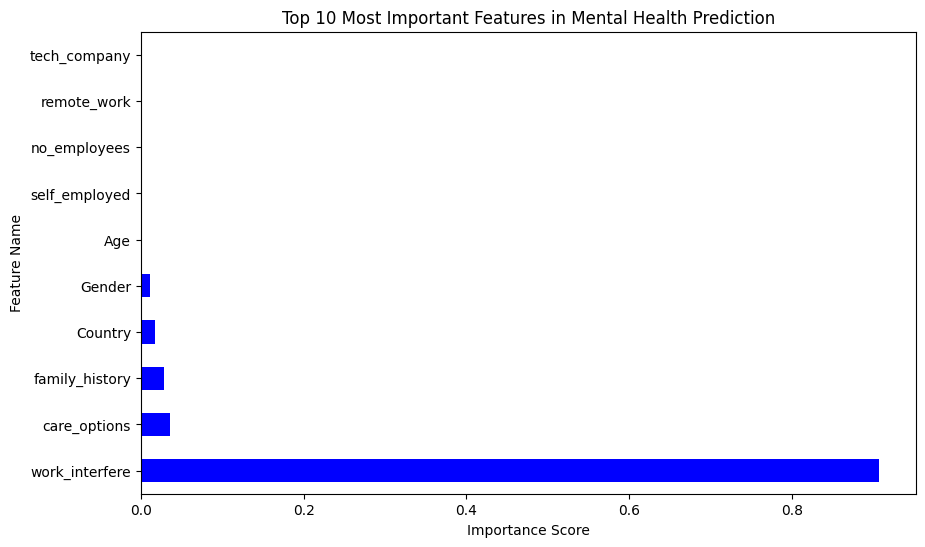

In [415]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Plot top features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='blue')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Most Important Features in Mental Health Prediction")
plt.show()

In [416]:
# Focusing on the 3 important features
# Redefine the dataset
X_selected = df[['work_interfere', 'care_options', 'family_history']]
y = df['treatment'] 


In [417]:
#split the model

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [418]:
# train the model

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [419]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       129
           1       0.75      0.91      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252



In [420]:
# Auto looking for the right max depth, min_samples_leaf, min_samples_split

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [421]:
from sklearn.tree import DecisionTreeClassifier

# Define the model with hyperparameters
model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

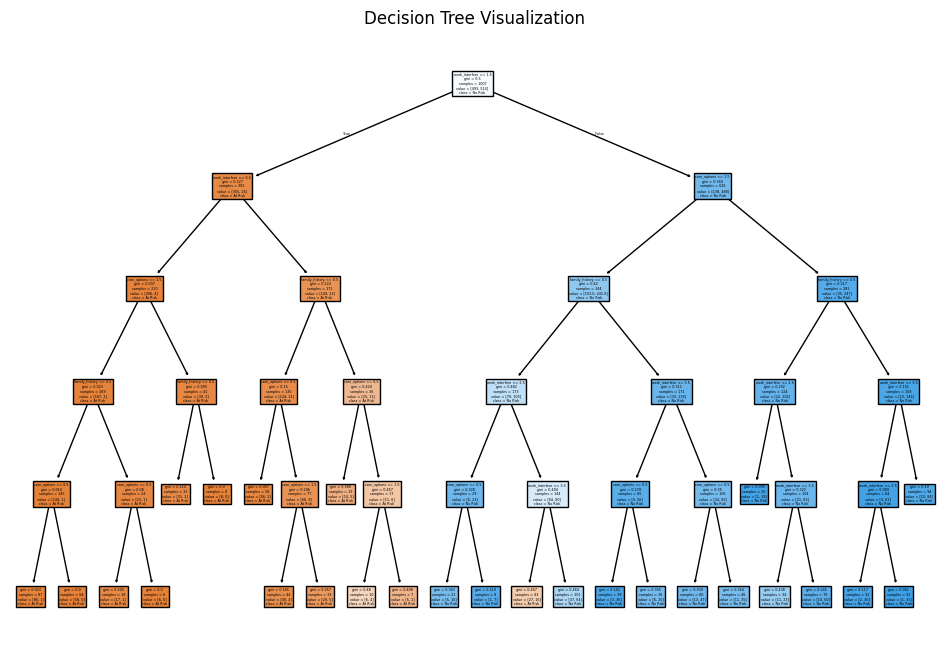

In [422]:
# plotting the decision tree



plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train.columns, class_names=['At Risk', 'No Risk'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [423]:
# Checking training and test accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.85
Test Accuracy: 0.81


In [424]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.85


In [425]:
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       129
           1       0.75      0.91      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252



In [426]:
# handling class imbalance

model = DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5, random_state=42)

In [434]:
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       129
           1       0.75      0.89      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252



In [451]:
# prunning to refine the 
model = DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5, 
                               min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [452]:
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       129
           1       0.80      0.77      0.79       123

    accuracy                           0.79       252
   macro avg       0.79      0.79      0.79       252
weighted avg       0.79      0.79      0.79       252



In [453]:
model = DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5, 
                               max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5,
                       max_features='sqrt', random_state=42)

In [454]:
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       129
           1       0.80      0.77      0.79       123

    accuracy                           0.79       252
   macro avg       0.79      0.79      0.79       252
weighted avg       0.79      0.79      0.79       252



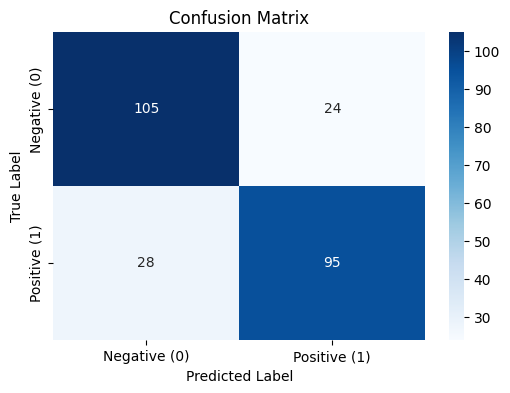

In [455]:
## Visualize the false positives
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative (0)", "Positive (1)"], yticklabels=["Negative (0)", "Positive (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [443]:
### Using logistic regression

# Define logistic regression with regularization
model2 = LogisticRegression(C=1.0, class_weight={0: 2, 1: 1}, random_state=42)
model2.fit(X_train, y_train)


LogisticRegression(class_weight={0: 2, 1: 1}, random_state=42)

In [444]:
y_pred = model2.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       129
           1       0.78      0.68      0.73       123

    accuracy                           0.75       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.75      0.75      0.75       252



In [446]:
## Handling class imbalance

from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42)
model2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42)

In [447]:
y_pred = model2.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       129
           1       0.75      0.89      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252



In [448]:
#refining more

model2 = LogisticRegression(class_weight={0: 1, 1: 2}, solver='liblinear', random_state=42)
model2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42,
                   solver='liblinear')

In [449]:
y_pred = model2.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       129
           1       0.75      0.89      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252



In [457]:
!pip install imbalanced-learn

In [462]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [461]:
y_pred = model2.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       129
           1       0.75      0.89      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252



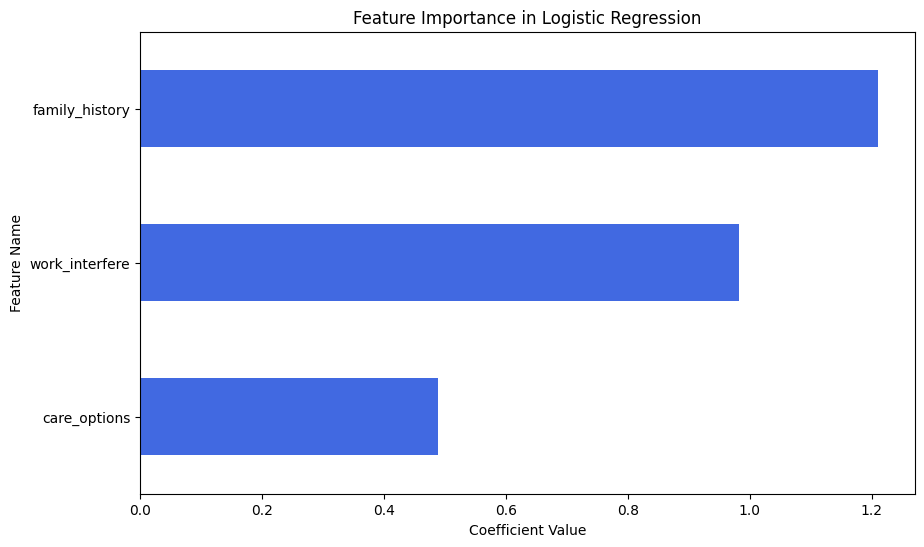

In [463]:
## Visuaizations
# Get feature importance (model coefficients)
feature_importance = pd.Series(model2.coef_[0], index=X_train.columns)

# Plot them
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='royalblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Logistic Regression")
plt.show()


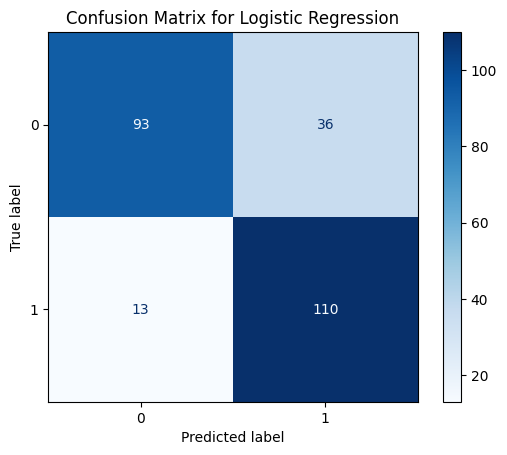

In [476]:

ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [467]:

# Logistic Regression Predictions
y_pred_lr = model2.predict(X_test)
print("🔹 Logistic Regression Metrics")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))

# Decision Tree Predictions
y_pred_dt = model.predict(X_test)
print("\n🔹 Decision Tree Metrics")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))

🔹 Logistic Regression Metrics
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       129
           1       0.75      0.89      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252


🔹 Decision Tree Metrics
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       129
           1       0.80      0.77      0.79       123

    accuracy                           0.79       252
   macro avg       0.79      0.79      0.79       252
weighted avg       0.79      0.79      0.79       252



In [468]:
# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Decision Tree CV Mean Accuracy: {dt_cv_scores.mean():.2f}")

# Logistic Regression Cross-Validation
lr_cv_scores = cross_val_score(model2, X_train, y_train, cv=5)
print(f"Logistic Regression CV Mean Accuracy: {lr_cv_scores.mean():.2f}")

Decision Tree CV Mean Accuracy: 0.80
Logistic Regression CV Mean Accuracy: 0.82


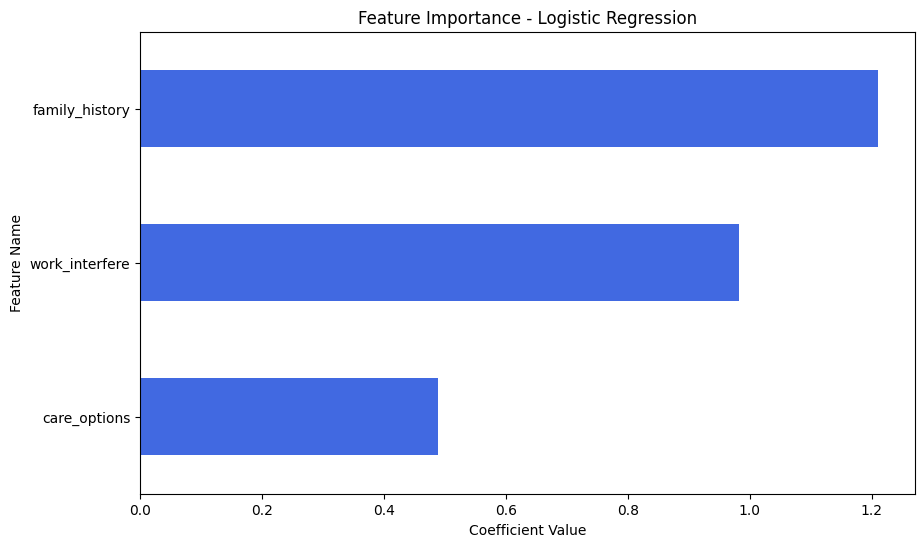

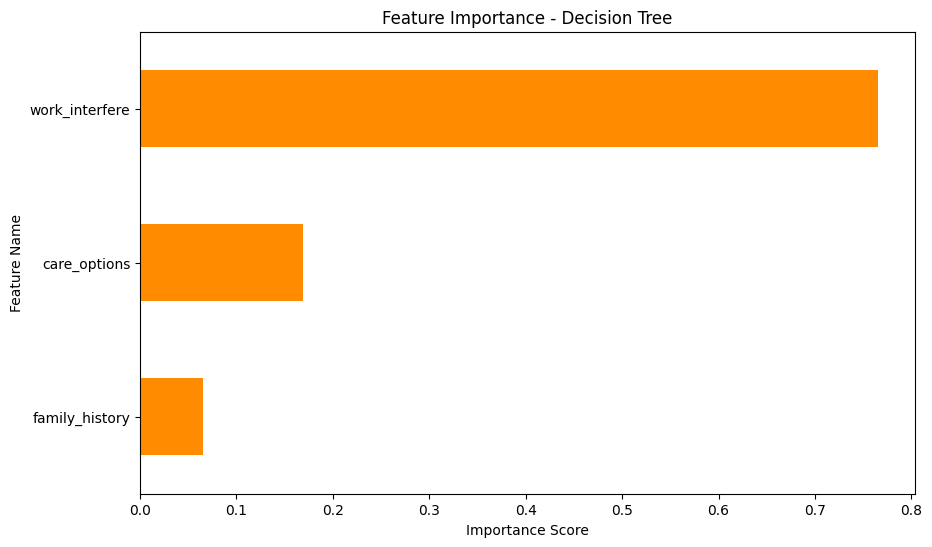

In [469]:
# Logistic Regression Coefficients
lr_importance = pd.Series(model2.coef_[0], index=X_train.columns)
plt.figure(figsize=(10, 6))
lr_importance.sort_values().plot(kind='barh', color='royalblue')
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.show()

# Decision Tree Feature Importance
dt_importance = pd.Series(model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
dt_importance.sort_values().plot(kind='barh', color='darkorange')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

####  Comparing between Decision Tree and Logistic regression For The Model

- Although the decision tree is capturing more complex patterns it had one dominant feature (work_interfere), making it hard to interpret since it's relying too much on specific splits, Therefore logistic regression will be best for the model for much better interpretability.

### 5. Conclusions


#### Objective 1: Early Identification of At-Risk Employee
 
- The model has successfully classified employees as at risk or not at risk. Feature selection helped refine inputs, ensuring accuracy and avoiding irrelevant predictors. Improvements on the recall ensured high risk employees are not over looked.

#### Objective 2: Identified Key Risk Factors

- Work_interfere i.e work stress emerged as a top predictor but required fine-tuning due to false positives.

- Family history of mental health conditions significantly influences risk classification.

- The feature importance visualization provides a clear understanding of which variables matter most in predicting mental health risks.

#### Objective 3: Enabled Proactive Intervention
- The model enables early intervention by flagging employees at risk, allowing HR teams to act before issues escalate.
  
- The decision tree insights provide explainable recommendations for wellness programs and targeted policies.

- Logistic regression offers probability-based classification, helping organizations assess risk severity more precisely.

- The ability to balance false positives vs false negatives ensures intervention efforts target those who truly need support, rather than overwhelming resources.
